In [19]:
# Loading libraries
import sqlite3 as sq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Reading CSV file
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
#building connection
conn=sq.connect("netflix.db")


In [5]:
#Describing data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
#Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#Checking for Null values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
#Treating missing values

df["director"].fillna("Unknown", inplace=True)
df["cast"].fillna("Not available", inplace=True)

df["country"].fillna("Unknown", inplace=True)

df.dropna(subset=["date_added"], inplace=True)

df["rating"].fillna(df["rating"].mode()[0], inplace=True)

df["duration"].fillna("Unknown", inplace=True)


/tmp/ipython-input-8-4207271015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["director"].fillna("Unknown", inplace=True)
/tmp/ipython-input-8-4207271015.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [9]:
#Null values after treatment
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [10]:
#Creating a table 'netflix'
df.to_sql("netflix", conn, if_exists="replace", index=False)


8797

In [11]:
#df.drop(columns=["description"], inplace=True)


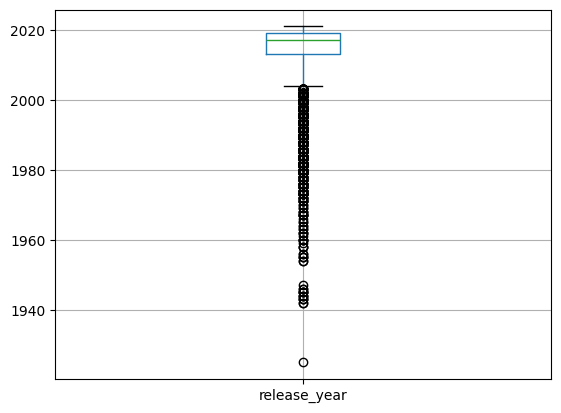

In [20]:
#Boxplot
df.boxplot(column=["release_year"])
plt.show()

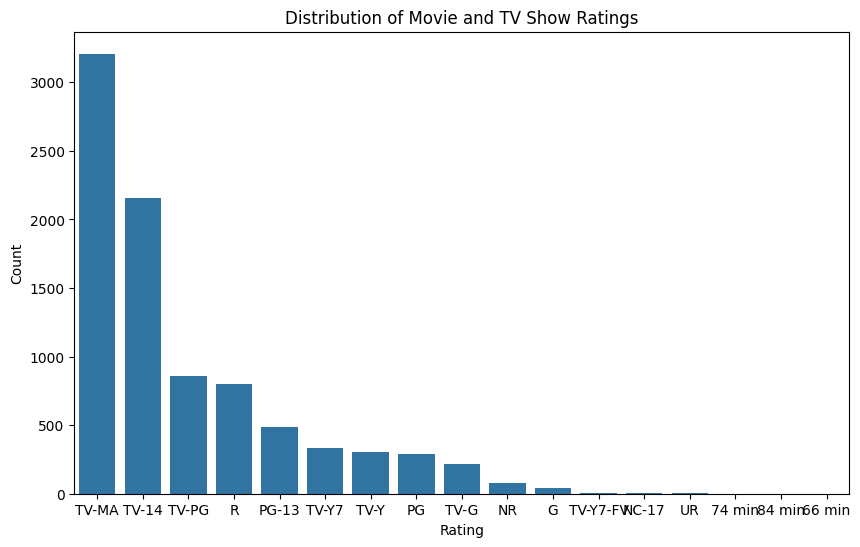

In [25]:
#Plotting bargraph
ratings = df['rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ratings.index, y=ratings.values)
plt.title('Distribution of Movie and TV Show Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# **SQL QUERIES**

In [ ]:
# Query: Count the number of rows in the 'netflix' table
query = "SELECT COUNT(*) FROM netflix"
pd.read_sql_query(query, conn)

,COUNT(*)
0,8797


In [ ]:
# Query: Select the first 5 rows from the 'netflix' table
q2='SELECT * FROM netflix LIMIT 5'
pd.read_sql_query(q2,conn)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not available,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Query: Count the number of entries for each type in the 'netflix' table and group by type
q3="SELECT type, COUNT(*) FROM netflix GROUP BY type"
pd.read_sql_query(q3,conn)

,type,COUNT(*)
0,Movie,6131
1,TV Show,2666


In [ ]:
# Query: Select countries from the 'netflix' table, grouped by country and ordered by the count of entries
q4="SELECT country FROM netflix GROUP BY country ORDER BY COUNT(*)"
pd.read_sql_query(q4,conn).head(5)

,country
0,", France, Algeria"
1,", South Korea"
2,"Argentina, Brazil, France, Poland, Germany, De..."
3,"Argentina, Chile, Peru"
4,"Argentina, France"


In [ ]:
df["country"].nunique()

749

In [ ]:
#Since some shows has many countries so splitting it
df_exploded = df.assign(country=df['country'].str.split(',')).explode('country')
df_exploded['country'] = df_exploded['country'].str.strip()


In [ ]:
df_exploded.to_sql("netflix_cleaned", conn, if_exists="replace", index=False)


10840

In [ ]:
#df.to_csv(r"C:\Users\samar\OneDrive\ドキュメント\Projects\Project files\netflix_cleaned.csv", index=False)


In [ ]:
# Query: Count the number of entries per country in the 'netflix_cleaned' table and order by the total count
q5="SELECT country, COUNT(*) AS total FROM netflix_cleaned GROUP BY country ORDER BY total  DESC ;"
pd.read_sql_query(q5,conn).head(5)

,country,total
0,United States,3684
1,India,1046
2,Unknown,830
3,United Kingdom,805
4,Canada,445


In [ ]:
# Query: Count the number of entries per release year in the 'netflix_cleaned' table and order by the total count
q6="SELECT release_year, COUNT(*) AS total FROM netflix_cleaned GROUP BY release_year ORDER BY total DESC ;"
pd.read_sql_query(q6,conn)

,release_year,total
0,2018,1391
1,2017,1276
2,2019,1208
3,2016,1154
4,2020,1055
...,...,...
69,1942,2
70,1966,1
71,1959,1
72,1947,1


In [ ]:
# Query: Count the number of entries per rating in the 'netflix_cleaned' table and order by the total count
q7="SELECT rating, COUNT(*) AS total FROM netflix_cleaned GROUP BY rating ORDER BY total DESC ;"
pd.read_sql_query(q7,conn).head()

,rating,total
0,TV-MA,3757
1,TV-14,2403
2,R,1236
3,TV-PG,1000
4,PG-13,769
